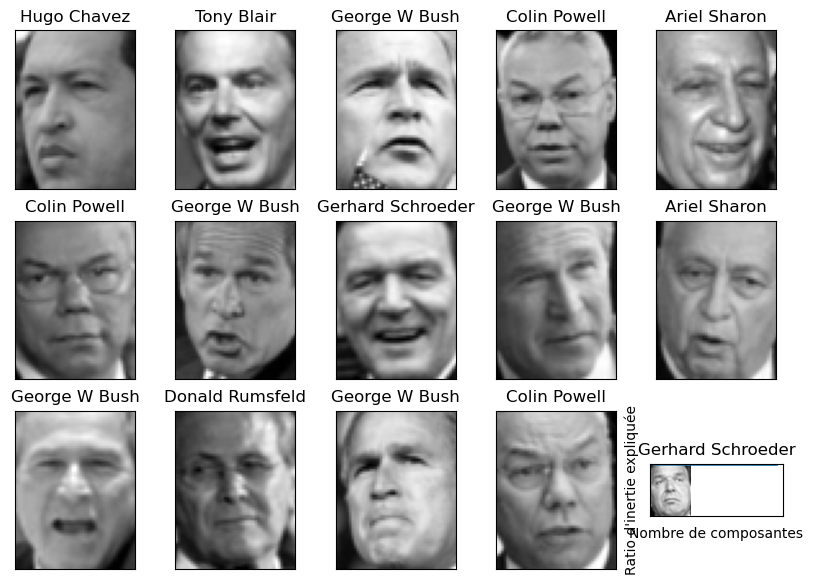

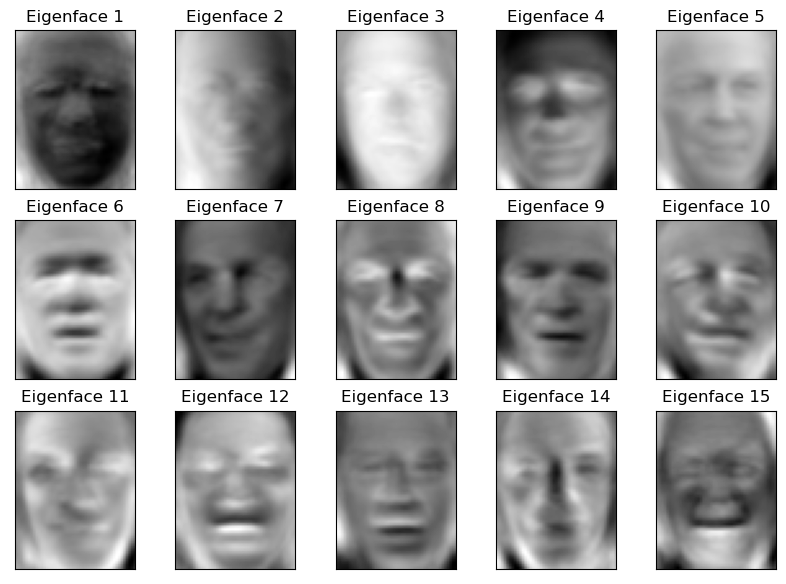

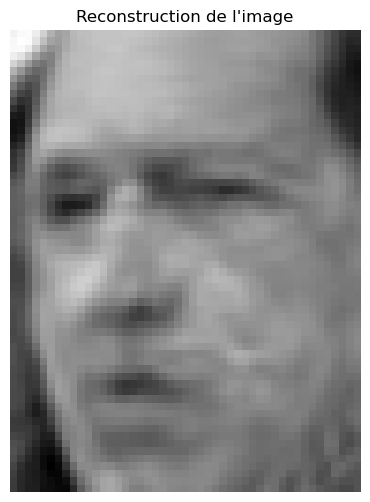

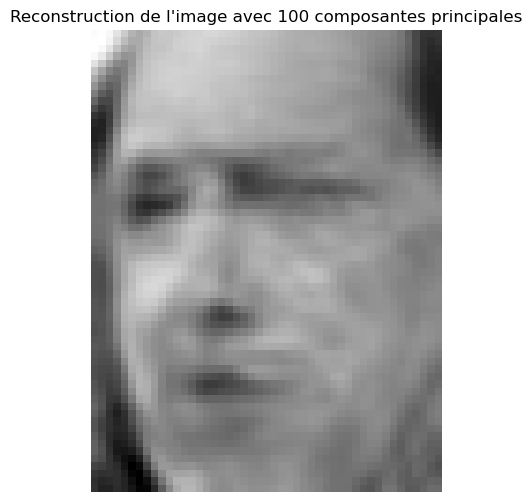

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA

# Importer la base de données faces
faces = fetch_lfw_people(min_faces_per_person=70)

# Afficher quelques images
fig, axes = plt.subplots(3, 5, figsize=(10, 7),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, ax in enumerate(axes.ravel()):
    ax.imshow(faces.images[i], cmap='gray')
    ax.set_title(faces.target_names[faces.target[i]])

# Effectuer l'ACP sur les données
pca = PCA(n_components=150)
pca.fit(faces.data)

# Afficher le pourcentage d'inertie expliquée par chaque axe
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de composantes')
plt.ylabel('Ratio d\'inertie expliquée')
plt.show()

# Afficher les "Eigenfaces"
fig, axes = plt.subplots(3, 5, figsize=(10, 7),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, ax in enumerate(axes.ravel()):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='gray')
    ax.set_title('Eigenface {}'.format(i+1))
plt.show()

# Reconstruire une image à partir des composantes principales
fig, ax = plt.subplots(figsize=(8, 6))
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)
ax.imshow(projected[0].reshape(62, 47), cmap='gray')
ax.set_title('Reconstruction de l\'image')
ax.axis('off')
plt.show()

# Reconstruire une image à partir d'un nombre réduit de composantes
n_components = 100
fig, ax = plt.subplots(figsize=(8, 6))
components = pca.transform(faces.data)
components[:, n_components:] = 0
projected = pca.inverse_transform(components)
ax.imshow(projected[0].reshape(62, 47), cmap='gray')
ax.set_title('Reconstruction de l\'image avec {} composantes principales'.format(n_components))
ax.axis('off')
plt.show()